# `transfer_function`

This module contains some functions used for characterizing systems with their IR or transfer functions (TF).

In [1]:
import dsptoolbox as dsp
from os.path import join

### Transfer function
The TF of a stochastic process can be gained by getting its averaged spectrum (using welch's method for instance).

(<Figure size 800x200 with 1 Axes>,
 [<Axes: xlabel='Frequency / Hz', ylabel='$\\gamma^2$ Coherence 0'>])

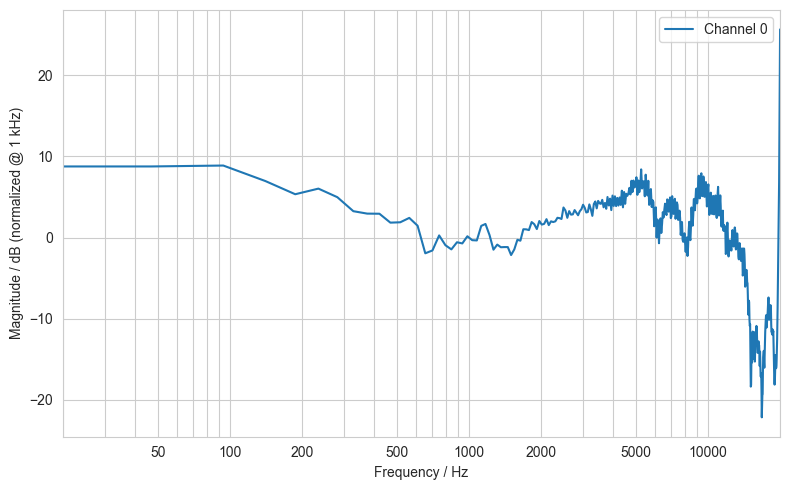

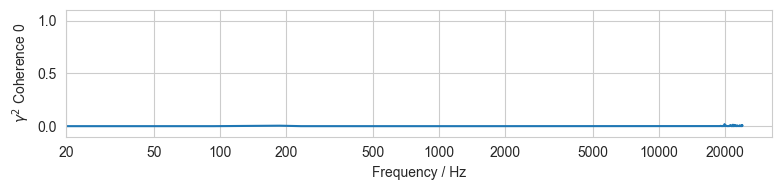

In [13]:
import numpy as np

rec = dsp.Signal(join('data', 'chirp_mono.wav'))
raw = dsp.Signal(join('data', 'chirp.wav'))
tf = dsp.transfer_functions.compute_transfer_function(
    rec, input=raw, mode='h3')

# See TF's magnitude
tf.plot_magnitude()

# Coherence
tf.plot_coherence()
# NOTE: Since this is not a stochastic signal and the characterized system
#       has considerable delay, the coherence for this example is very low

### Spectral deconvolve
For deterministic signals, one can characterize the system by deconvolving the input from the output.

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='Frequency / Hz', ylabel='Magnitude / dB (normalized @ 1 kHz)'>)

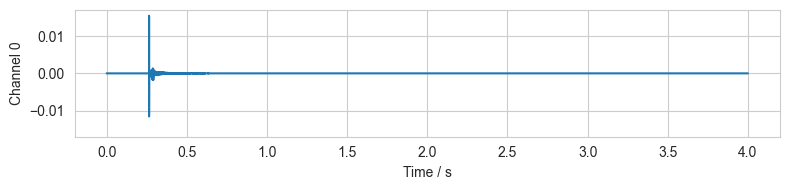

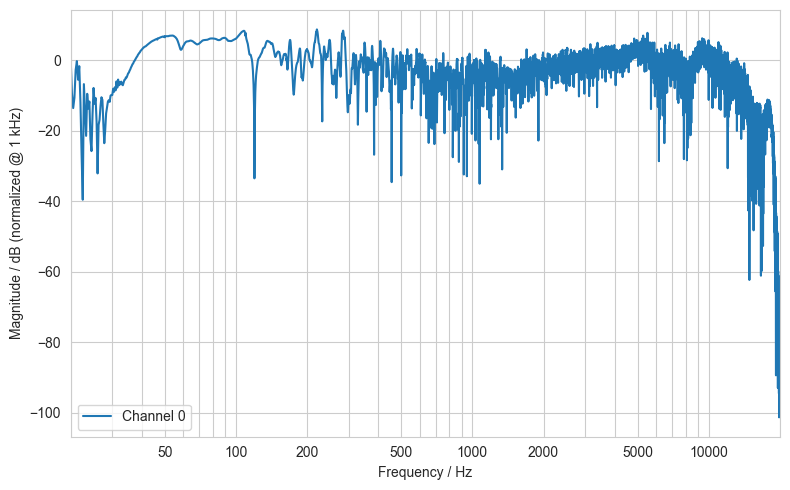

In [14]:
system = dsp.transfer_functions.spectral_deconvolve(
    num=rec, denum=raw, mode='regularized', start_stop_hz=[30, 15e3],
    padding=True, keep_original_length=True)
system.plot_time()
system.plot_magnitude()

### Other functions
Some functions for acquiring the minimum-phase system and group delay are given.

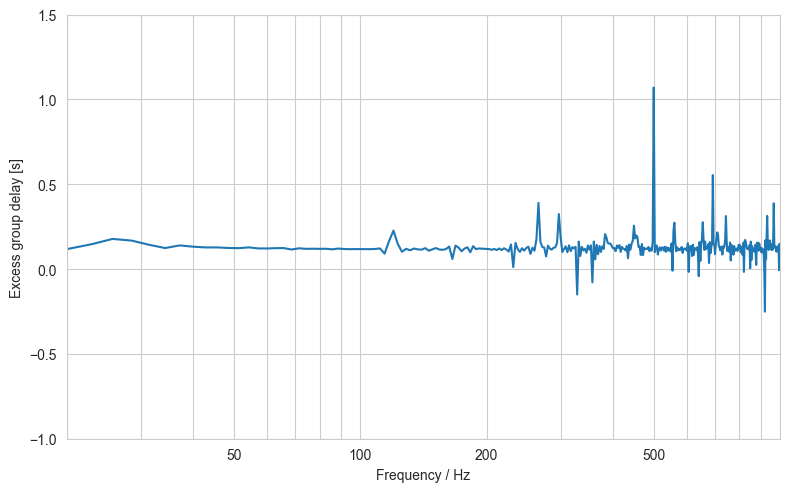

In [15]:
# Trim signal for shorter computation time (distorts the answer, only for demonstration purposes)
system = dsp.pad_trim(system, int(0.5*system.sampling_rate_hz))
system = dsp.pad_trim(system, int(0.35*system.sampling_rate_hz),
                      in_the_end=False)

f, gd = dsp.transfer_functions.excess_group_delay(system)
fig, ax = dsp.plots.general_plot(f, gd, range_x=[20, 1e3],
                                 ylabel='Excess group delay [s]',
                                 returns=True)
ax.set_ylim([-1, 1.5]);

### Window the IR

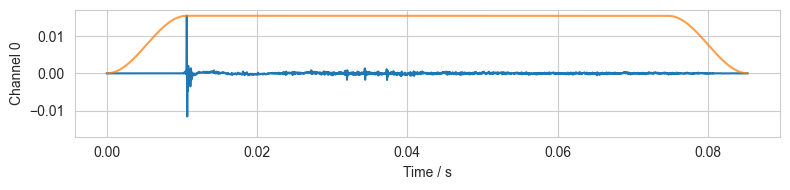

In [16]:
# Window (in time) the IR
system_wind, _ = dsp.transfer_functions.window_ir(system, 2**12)
system_wind.plot_time();